In [3]:
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

# Apresentando a informação
Na seção "Transparência" no site do Senado Federal, é possível localizar os dados da CEAPS (Cota para o Exercício da Atividade Parlamentar dos Senadores), que é um valor disponibilizado pelo Governo para cada senador poder usufruir no exercício de sua função. O valor da cota depende da unidade da federação que o deputado representa e a diferença entre os valores de cada estado se baseia no custo da passagem de avião entre o estado de eleição do senador e Brasília.

Neste projeto, estarei utilizando o arquivo do CEAPS de 2017 até 2022.

Realizando a visualização dos dados obtidos no [Portal da transparência](https://www12.senado.leg.br/transparencia/dados-abertos-transparencia/dados-abertos-ceaps) e tratados no dia 1 do 7days code

In [4]:
df = pd.read_csv("despesa_ceaps_2017-2022.csv")

In [5]:
df.head(3)

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DOCUMENTO,DATA,DETALHAMENTO,VALOR_REEMBOLSADO,COD_DOCUMENTO
0,2022,1,ACIR GURGACZ,"Aluguel de imóveis para escritório político, c...",004.948.028-63,GILBERTO PISELO DO NASCIMENTO,001/22,2022-03-01,Despesa com pagamento de aluguel de imóvel par...,6000.0,2173614
1,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,26.320.603/0001-64,INFORMANAHORA,000000000000310/A,2022-04-01,Despesa com divulgação da atividade parlamenta...,1500.0,2173615
2,2022,1,ACIR GURGACZ,Divulgação da atividade parlamentar,13.659.201/0001-47,LINHA PURPURA FOTO E VIDEO LTDA,107,2022-01-14,Despesa com produção de texto e edição de víde...,6000.0,2173616


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 106248 entries, 0 to 106247
Data columns (total 11 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   ANO                106248 non-null  int64  
 1   MES                106248 non-null  int64  
 2   SENADOR            106248 non-null  object 
 3   TIPO_DESPESA       106248 non-null  object 
 4   CNPJ_CPF           106248 non-null  object 
 5   FORNECEDOR         106248 non-null  object 
 6   DOCUMENTO          105529 non-null  object 
 7   DATA               106248 non-null  object 
 8   DETALHAMENTO       97777 non-null   object 
 9   VALOR_REEMBOLSADO  106248 non-null  float64
 10  COD_DOCUMENTO      106248 non-null  int64  
dtypes: float64(1), int64(3), object(7)
memory usage: 8.9+ MB


In [7]:
df["DATA"] = pd.to_datetime(df['DATA'],infer_datetime_format= True)

In [8]:
df["DATA"]

0        2022-03-01
1        2022-04-01
2        2022-01-14
3        2022-01-18
4        2022-01-17
            ...    
106243   2017-12-18
106244   2017-12-19
106245   2017-06-06
106246   2017-12-14
106247   2017-12-14
Name: DATA, Length: 106248, dtype: datetime64[ns]

## Dropando colunas que não nos importam "DOCUMENTO", "COD_DOCUMENTO", 

`"CPJ_CPF" Como temos o nome do fornecedor não precisamos de cnpj_cpf`

In [9]:
df.drop(["COD_DOCUMENTO","DOCUMENTO"],axis= 1, inplace=True)

In [10]:
df.columns

Index(['ANO', 'MES', 'SENADOR', 'TIPO_DESPESA', 'CNPJ_CPF', 'FORNECEDOR',
       'DATA', 'DETALHAMENTO', 'VALOR_REEMBOLSADO'],
      dtype='object')

# EDA

In [11]:
df["ANO"].value_counts()

2017    26777
2018    24180
2019    21438
2021    16560
2020    13797
2022     3496
Name: ANO, dtype: int64

In [80]:
df[["VALOR_REEMBOLSADO"]].describe()

,VALOR_REEMBOLSADO
count,106248.000000
mean,1180.784423
std,2714.858603
min,-243.400000
25%,137.610000
50%,350.915000
75%,1271.475000
max,120000.000000


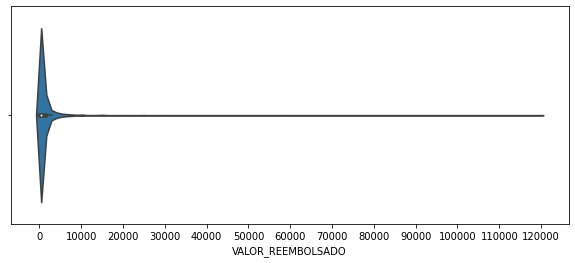

In [76]:
plt.figure(figsize=(10,4))
g = sns.violinplot(x=df["VALOR_REEMBOLSADO"])
g.set_xticks(np.arange(0,130000,10000));

Podemos observar que a quantia reembolsada em `média` custa **R$ 1.180,78**

O valor que divide a distribuição dos dados na metade, `mediana`, é de **R$ 350,91**

O `maior` valor reembolsado foi de **R$ 102.000,00**, vamos ver quem gastou isso

Grande parte dos valores reembolsados está abaixo de **R$1.271** reais

## Qual a distribuição dos gastos

In [13]:
df = df.sort_values(by="DATA")
df = df.reset_index()
df.drop("index", axis =1, inplace = True)

### Distribuição Anual

In [14]:
gasto_anual = df[["ANO","VALOR_REEMBOLSADO"]].groupby("ANO").sum()

In [15]:
gasto_anual

,VALOR_REEMBOLSADO
ANO,
2017,25880824.59
2018,24971308.28
2019,24848892.69
2020,19297135.27
2021,24554044.10
2022,5903778.41


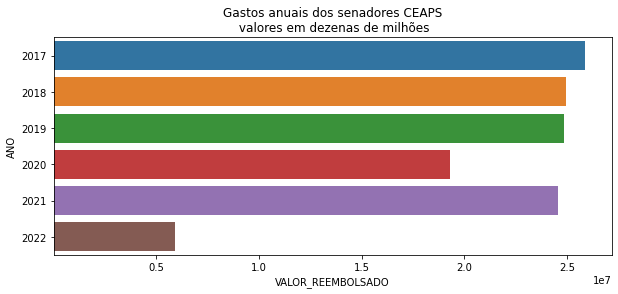

In [305]:
plt.figure(figsize=(10,4))
g = sns.barplot(y = gasto_anual.index, x = gasto_anual.VALOR_REEMBOLSADO, orient="h")
g.set_xticks(np.arange(5000000,26000000,5000000))
g.set_title("Gastos anuais dos senadores CEAPS\n valores em dezenas de milhões");

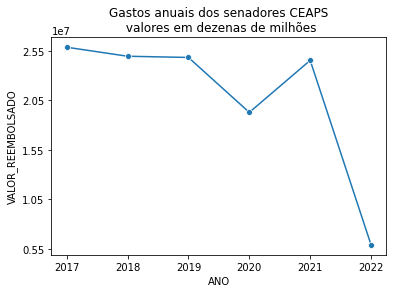

In [306]:
g = sns.lineplot(y = "VALOR_REEMBOLSADO", x= gasto_anual.index, data = gasto_anual, ci = None, marker = "o")
g.set_yticks(np.arange(5500000,26000000,5000000),)
g.set_title("Gastos anuais dos senadores CEAPS\n valores em dezenas de milhões");

In [104]:
gasto_anual.iloc[:-1].mean()[0]

23910440.986

In [107]:
(gasto_anual.iloc[:-1].mean()[0]) / 81

295190.62945679016

In [108]:
295190/12

24599.166666666668

média dos gastos anuais entre 2017 e 2021 foi de R\$ 23.910.440,98. Se o gasto fosse dividido igualmente entre todos os 81 senadores teriamos uma valor médio de R\$ 295.190 por senador por ano ou R\$ 24.599 reais por senador por mes.


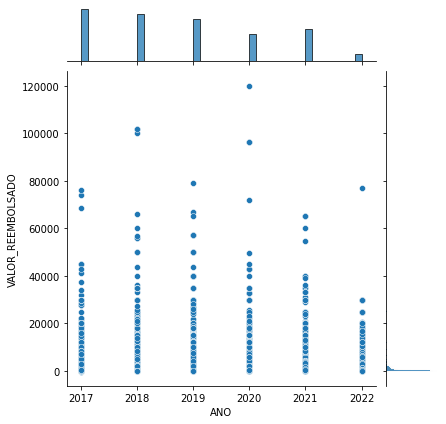

In [19]:
sns.jointplot(data = df, y="VALOR_REEMBOLSADO", x = "ANO")

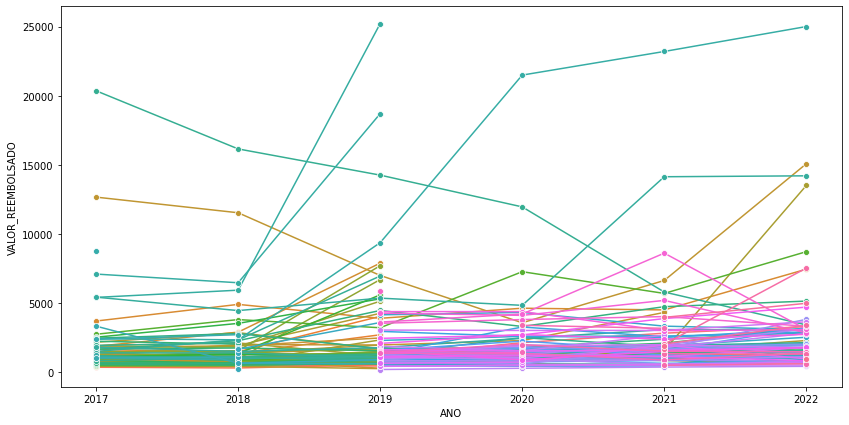

In [115]:
plt.figure(figsize=(14,7))
graph = sns.lineplot(y = "VALOR_REEMBOLSADO", x="ANO", hue = "SENADOR", data = df, ci = None, marker = "o")
graph.get_legend().remove() # remover legendA
#graph.legend(loc='upper right', bbox_to_anchor=(1.4, 1));

Neste último gráfico, que está poluido devido ao grande número de dados analisádos percebemos 2 coisas:
1. há uma ruptura de determinados valores em 2019, isso porque foi ano de eleição para o senado alguns não se reelegeram.
2. alguns senadores gastam valores bem acima dos demais.

outra coisa é que parece haver uma crescente nos gastos no ano antes da eleição, vamos ver

In [21]:
df_ate_19 = df[df["ANO"] <=2019]

In [22]:
df_ate_19.head()

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
0,2017,2,DALIRIO BEBER,"Aluguel de imóveis para escritório político, c...",83.108.357/0001-15,PREFEITURA MUNICIPL DE BLUMENAU SC,2017-01-01,IPTU 2017 - escritório político em Blumenau - ...,426.65
1,2017,1,ROMERO JUCÁ,"Aluguel de imóveis para escritório político, c...",40.432.544/0001-47,Claro S/A,2017-01-01,Referente a telefone fixo do escritório politi...,11.68
2,2017,1,ALOYSIO NUNES FERREIRA,"Aluguel de imóveis para escritório político, c...",46.392.130/0005-41,PREFEITURA DE SÃO PAULO,2017-01-01,DESPESA COM IPTU REFERENTE AO ESCRITÓRIO PARLA...,684.95
3,2017,1,MARIA DO CARMO ALVES,"Locomoção, hospedagem, alimentação, combustíve...",361.639.705-78,ARTAXERXES DOS SANTOS,2017-01-01,Sem informacao,3000.00
4,2017,1,MARIA DO CARMO ALVES,"Aluguel de imóveis para escritório político, c...",13.018.171/0001-90,DESO - COMPANHIA DE SANEAMENTO DE SERGIPE,2017-01-01,Sem informacao,55.53


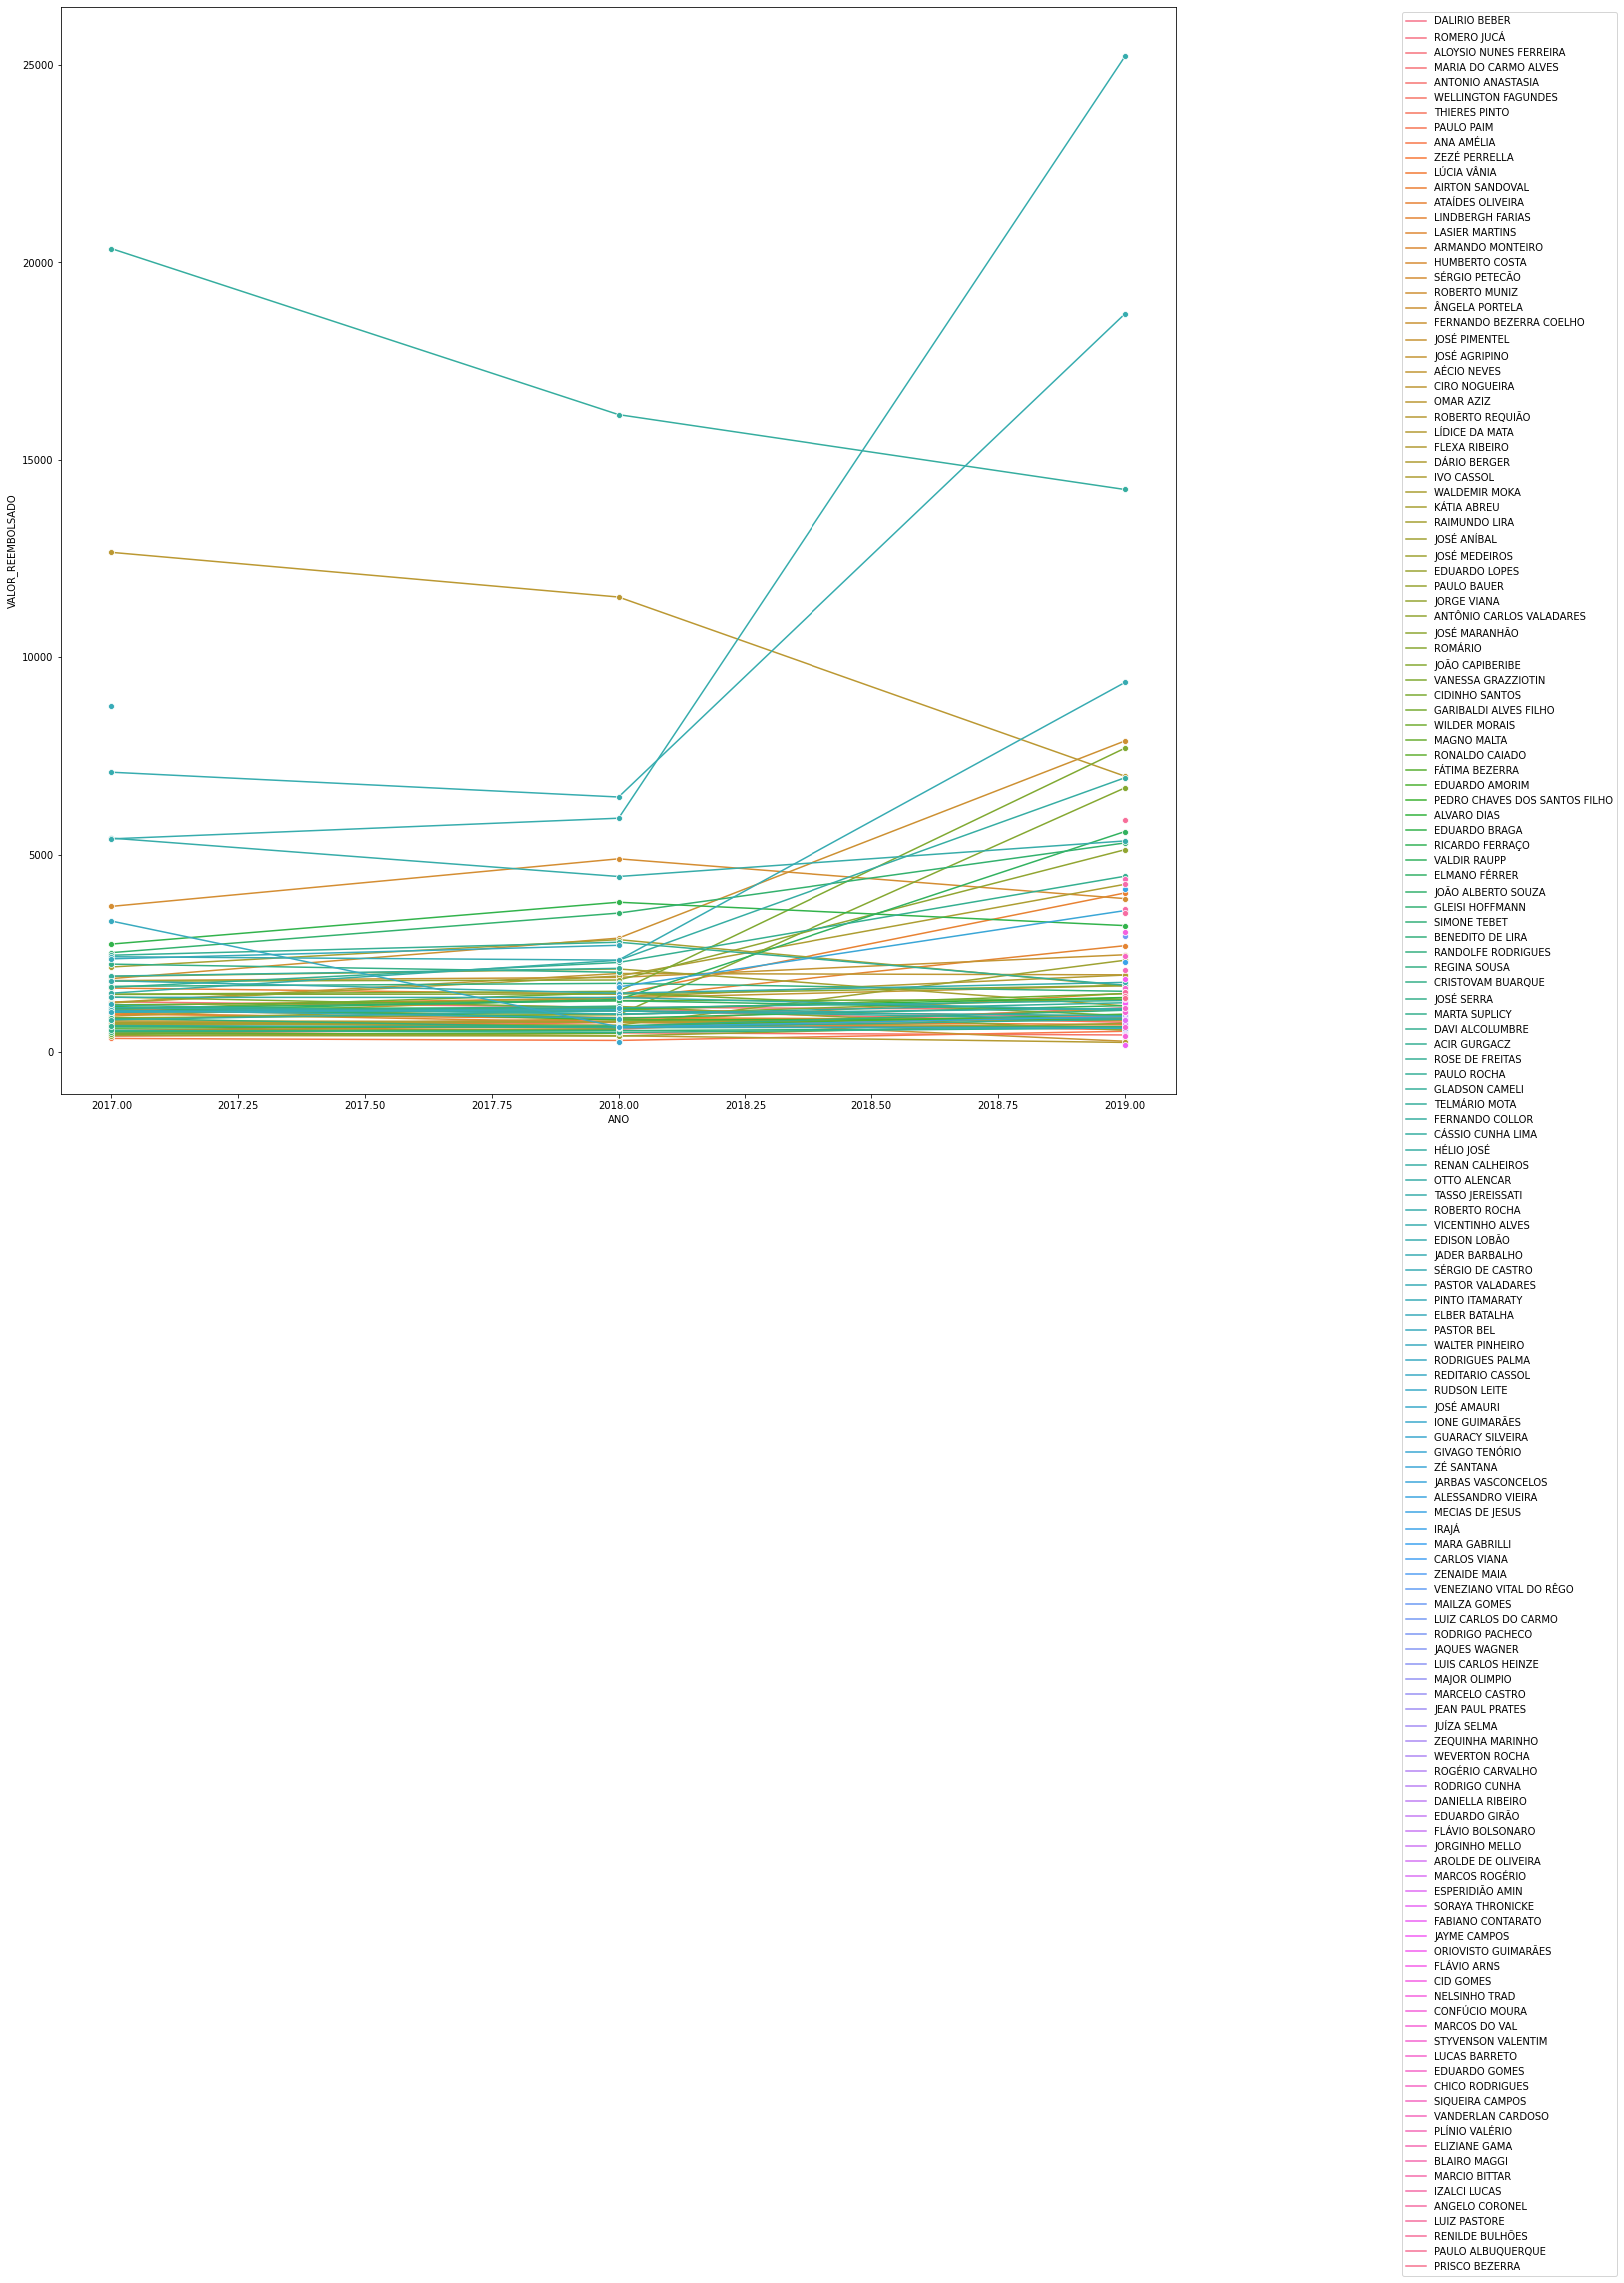

In [23]:
plt.figure(figsize=(20,20))
graph = sns.lineplot(y = "VALOR_REEMBOLSADO", x="ANO", hue = "SENADOR", data = df_ate_19, ci = None, marker = "o")
graph.legend(loc='upper right', bbox_to_anchor=(1.4, 1))

In [24]:
df17 = df[df["ANO"] == 2017]
df18 = df[df["ANO"] == 2018]
df19 = df[df["ANO"] == 2019]

In [25]:
def gastos_senador_anual(df):
  gastos = {}
  for senador in df["SENADOR"].unique():
    dados_senador = df[df["SENADOR"] == senador]
    gastos[senador] = [dados_senador["VALOR_REEMBOLSADO"].sum()]
  
  return pd.DataFrame.from_dict(gastos, orient="index")


In [26]:
df17 = gastos_senador_anual(df17)
df18 = gastos_senador_anual(df18)
df19 = gastos_senador_anual(df19)
df17 = df17.reset_index()
df18 = df18.reset_index()
df19 = df19.reset_index()

In [27]:
df17_18 = df17.merge(df18, left_on="index",right_on="index" )

df17_18 = df17_18.rename(columns={"index":"Senador", "0_x":"gasto 2017", "0_y":"gasto 2018"})

In [28]:
df17_18.columns

Index(['Senador', 'gasto 2017', 'gasto 2018'], dtype='object')

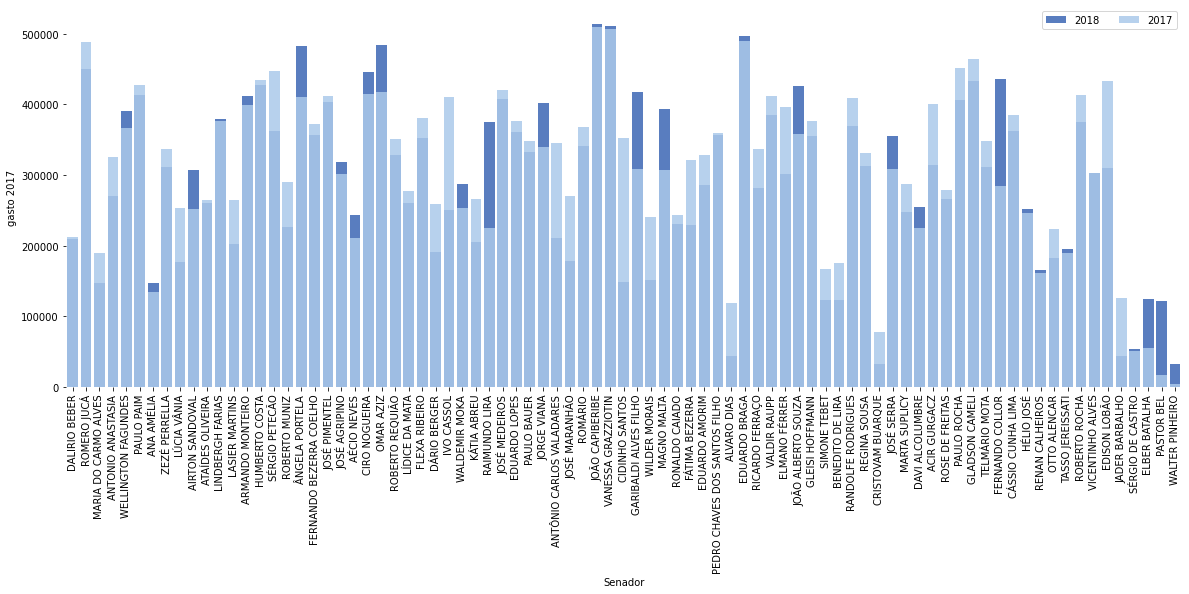

In [121]:
f, ax = plt.subplots(figsize=(20, 7))

#gastos 2018
sns.set_color_codes("muted")
sns.barplot(x="Senador", y="gasto 2018", data=df17_18,
            label="2018", color="b")

#gastos 2017
sns.set_color_codes("pastel")
sns.barplot(x="Senador", y="gasto 2017", data=df17_18,
            label="2017", color="b", alpha=0.85)

#legenda
ax.legend(ncol=2, loc="upper right", frameon=True)
ax.set_xticklabels(labels=df17_18.Senador,rotation=90)
sns.despine(left=True, bottom=True)

Podemos observar que nem todos os senadores possuem um aumento nos gastos durante o ano eleitoral. Vamos ver quantos porcento dos senadores possuem um aumento nos gastos

In [30]:
aumento_ano_eleitoral ={}
for senador in df17_18["Senador"]:
  gasto17 = df17_18["gasto 2017"][df17_18["Senador"] == senador].values[0]
  gasto18 = df17_18["gasto 2018"][df17_18["Senador"] == senador].values[0]

  if gasto17 <= gasto18:
    aumento_ano_eleitoral[senador] = ((gasto18 / gasto17)*100)-100

In [31]:
len(aumento_ano_eleitoral) / len(df17_18)*100

34.93975903614458

Vemos que 34.93% dos sendores realizaram um aumento dos gastos no ano eleitoral.

Vamos ver como foi o aumento entre os senadores que aumentaram seus gastos

In [32]:
#outlier
df17_18[df17_18["Senador"] == "WALTER PINHEIRO"] 

,Senador,gasto 2017,gasto 2018
82,WALTER PINHEIRO,3322.58,32733.67


In [33]:
aumento_ano_eleitoral

{'AIRTON SANDOVAL': 22.419258404965547,
 'ANA AMÉLIA': 8.81529263361513,
 'ARMANDO MONTEIRO': 3.332580909187243,
 'AÉCIO NEVES': 15.623415937481951,
 'CIRO NOGUEIRA': 7.7268988922538,
 'DAVI ALCOLUMBRE': 13.022104405454812,
 'EDUARDO BRAGA': 1.5026600125471106,
 'ELBER BATALHA': 128.97588302760093,
 'FERNANDO COLLOR': 53.00622443178449,
 'GARIBALDI ALVES FILHO': 35.12200624804396,
 'HÉLIO JOSÉ': 1.981192581314133,
 'JORGE VIANA': 18.049902972845217,
 'JOSÉ AGRIPINO': 5.728364545093953,
 'JOSÉ SERRA': 15.27237989026095,
 'JOÃO ALBERTO SOUZA': 19.037330772935988,
 'JOÃO CAPIBERIBE': 0.6631168968894912,
 'LINDBERGH FARIAS': 1.0392069618760047,
 'MAGNO MALTA': 27.963965014618978,
 'OMAR AZIZ': 15.894397980781605,
 'PASTOR BEL': 596.2335685496046,
 'RAIMUNDO LIRA': 67.13567230632236,
 'RENAN CALHEIROS': 3.170105126171478,
 'SÉRGIO DE CASTRO': 5.74893123204869,
 'TASSO JEREISSATI': 3.174708482295216,
 'VANESSA GRAZZIOTIN': 0.677942618290416,
 'WALDEMIR MOKA': 12.871692001596458,
 'WALTER PIN

In [34]:
porcentagem_gasto_ano_eleitoral = pd.DataFrame.from_dict(aumento_ano_eleitoral, orient="index")
porcentagem_gasto_ano_eleitoral.describe()

,0
count,29.000000
mean,68.737211
std,191.875252
min,0.663117
25%,3.332581
50%,13.022104
75%,22.419258
max,885.188318


In [35]:
porcentagem_gasto_ano_eleitoral.drop("WALTER PINHEIRO").describe()

,0
count,28.000000
mean,39.578243
std,112.291266
min,0.663117
25%,3.293113
50%,12.946898
75%,19.882813
max,596.233569


Podemos observar que:
1. O senador WALTER PINHEIRO teve um salto de **885%**, saindo de 
R\$ 3322,58 para R\$ 32733,67 entre 2017 e 2018 respectivamente.
O senador PASTOR BEL aumentou os gastos em **596%**

2. em média há um aumento de 68.73% nos gastos dos senadores em ano eleitoral,muito puxado por este valor já que a mediana é de 13%.*

*Sem contar o valor extremo do senador Walter Pinheiro a média do aumento dos gastos em ano eleitoral é de 39.57%.


### Distribuição Mensal
para não inflacionar o começo do mes vamos ver os valores até 2021

In [36]:
gastos_mensais = df[df["ANO"]<=2021].groupby('MES')['VALOR_REEMBOLSADO'].sum()  #até 2021

Text(0, 0.5, 'valores em dezenas de milhões')

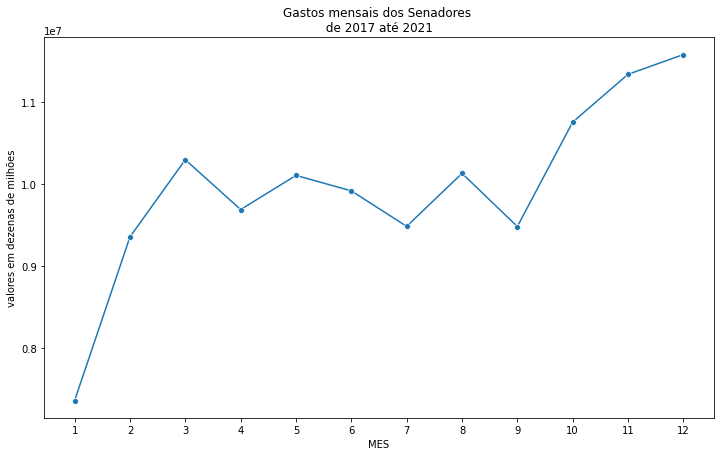

In [307]:
f, ax = plt.subplots(figsize=(12, 7))
graph = sns.lineplot(x= gastos_mensais.index, y=gastos_mensais.values, marker = "o")
ax.set_xticks(range(1,13));
plt.title("Gastos mensais dos Senadores \n de 2017 até 2021 ")
plt.ylabel("valores em dezenas de milhões")

Pode-se constatar na distribuição mensal que no primeiro mês do ano não há grandes gastos,sendo o menor gasto mensal em Janeiro, possívelmente devido ao período de recesso. Porém há uma crescente dos valores logo após.

Os maiores gastos se concentram no  último trimestre do ano, especialmente no mês de Novembro.

## Qual o maior valor gasto pelos senadores?



In [144]:
df[["VALOR_REEMBOLSADO","SENADOR","TIPO_DESPESA","DATA"]].sort_values(by=['VALOR_REEMBOLSADO'], ascending=False).head(10)

,VALOR_REEMBOLSADO,SENADOR,TIPO_DESPESA,DATA
86035,120000.0,WELLINGTON FAGUNDES,"Contratação de consultorias, assessorias, pesq...",2020-12-21
49296,102000.0,SÉRGIO PETECÃO,"Contratação de consultorias, assessorias, pesq...",2018-11-29
50490,102000.0,SÉRGIO PETECÃO,"Contratação de consultorias, assessorias, pesq...",2018-12-17
50484,100000.0,VANESSA GRAZZIOTIN,"Contratação de consultorias, assessorias, pesq...",2018-12-17
86217,96250.0,SÉRGIO PETECÃO,"Contratação de consultorias, assessorias, pesq...",2020-12-29
86011,96250.0,SÉRGIO PETECÃO,"Contratação de consultorias, assessorias, pesq...",2020-12-21
60984,79200.0,ROSE DE FREITAS,"Contratação de consultorias, assessorias, pesq...",2019-06-11
104367,77012.0,SÉRGIO PETECÃO,"Contratação de consultorias, assessorias, pesq...",2022-02-28
26479,76200.0,HÉLIO JOSÉ,Divulgação da atividade parlamentar,2017-12-21
12470,74100.0,SÉRGIO PETECÃO,Divulgação da atividade parlamentar,2017-06-12


Podemos constatar que o serviço de consultoria é o que incorre em maior valor gasto  de maneira unitária.
Entre os 10 maiores valores,  o top 8 composto por consultoria

O senador SÉRGIO PETECÃO	ocupa 6 das 10 posições do ranking

In [141]:
df[df["VALOR_REEMBOLSADO"] == 120000]

,ANO,MES,SENADOR,TIPO_DESPESA,CNPJ_CPF,FORNECEDOR,DATA,DETALHAMENTO,VALOR_REEMBOLSADO
86035,2020,12,WELLINGTON FAGUNDES,"Contratação de consultorias, assessorias, pesq...",23.721.017/0001-33,"T2 Comunicação, Video e Produções Eireli - EPP",2020-12-21,Despesa com serviço de consultoria e assessori...,120000.0


Estranha-se que o senador SÉRGIO PETECÃO seja responsável por 2 requisições de reembolso.
Com um valor tão exorbitante, 102 mil reais, comparado aos demais valores, ainda mais se considerarmos que estas ocorram em sómente 1 mês de diferença.

In [ ]:
top_gasto = df[["SENADOR","VALOR_REEMBOLSADO"]].groupby("SENADOR").sum().sort_values(by="VALOR_REEMBOLSADO", ascending = False)[:10]
top_gasto

In [186]:
top_gasto.T

SENADOR,PAULO ROCHA,EDUARDO BRAGA,TELMÁRIO MOTA,SÉRGIO PETECÃO,OMAR AZIZ,ROBERTO ROCHA,HUMBERTO COSTA,CIRO NOGUEIRA,WELLINGTON FAGUNDES,ACIR GURGACZ
VALOR_REEMBOLSADO,2374917.23,2349034.91,2238641.32,2212796.14,2182435.66,2136729.82,2014268.74,1959964.06,1958326.86,1923811.91


## Qual o senador gastou mais ao longo do tempo?

Text(0.5, 1.0, 'Top 10 senadores que mais gastaram no acumulado entre 2017 e 04/2022')

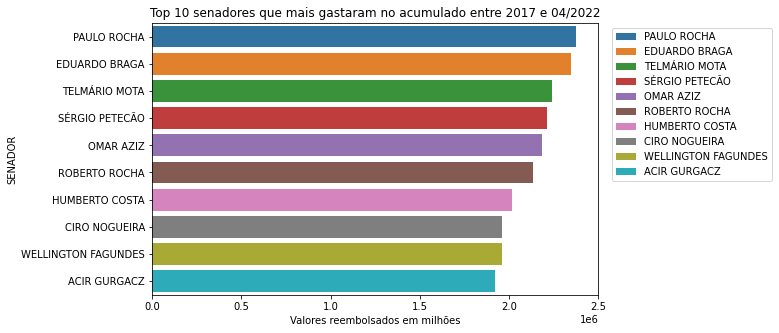

In [192]:
plt.figure(figsize=(8,5))
g= sns.barplot(data = top_gasto.reset_index(), x="VALOR_REEMBOLSADO",y="SENADOR", hue ="SENADOR", orient="h",dodge=False)

g.legend(loc='upper right', bbox_to_anchor=(1.4, 1))
g.set_xticks(np.arange(0,2600000,500000))
plt.xlabel("Valores reembolsados em milhões")
g.set_title("Top 10 senadores que mais gastaram no acumulado entre 2017 e 04/2022")

Não é de se estranhar que o senador SÉRGIO PETECÃO seja o 4º senador com maior quantia de reembolso durante todo o periodo

## E qual gastou menos?

In [55]:
min_gasto = df[["SENADOR","VALOR_REEMBOLSADO"]].groupby("SENADOR").sum().sort_values(by="VALOR_REEMBOLSADO", ascending = True)
min_gasto

,VALOR_REEMBOLSADO
SENADOR,
NAILDE PANTA,1650.62
PASTOR VALADARES,3654.36
VIRGINIO DE CARVALHO,5720.56
SIQUEIRA CAMPOS,5926.99
BLAIRO MAGGI,8543.95
...,...
OMAR AZIZ,2182435.66
SÉRGIO PETECÃO,2212796.14
TELMÁRIO MOTA,2238641.32


Text(0.5, 1.0, 'Top 10 Menores gastos pelos senadores')

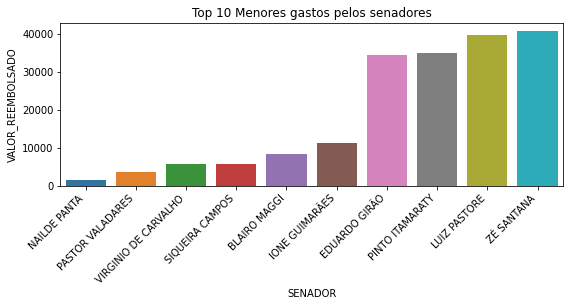

In [56]:
plt.figure(figsize=(9, 3))
chart = sns.barplot(data = min_gasto[:10], x=min_gasto.index[:10],y="VALOR_REEMBOLSADO")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.title("Top 10 Menores gastos pelos senadores")

# Qual o senador gastou mais por ano?

In [132]:
top10_2017_gasto = df[df["ANO"] ==2017].groupby("SENADOR").sum().sort_values(by="VALOR_REEMBOLSADO",ascending=False)[:10]
top10_2018_gasto = df[df["ANO"] ==2018].groupby("SENADOR").sum().sort_values(by="VALOR_REEMBOLSADO",ascending=False)[:10]
top10_2019_gasto = df[df["ANO"] ==2019].groupby("SENADOR").sum().sort_values(by="VALOR_REEMBOLSADO",ascending=False)[:10]
top10_2020_gasto = df[df["ANO"] == 2020].groupby("SENADOR").sum().sort_values(by="VALOR_REEMBOLSADO",ascending=False)[:10]
top10_2021_gasto = df[df["ANO"] ==2021].groupby("SENADOR").sum().sort_values(by="VALOR_REEMBOLSADO",ascending=False)[:10]

In [133]:
top10_2017_gasto

,ANO,MES,VALOR_REEMBOLSADO
SENADOR,,,
JOÃO CAPIBERIBE,1179945,4142,509952.32
VANESSA GRAZZIOTIN,695865,2317,506957.36
EDUARDO BRAGA,361043,1107,490232.65
ROMERO JUCÁ,897565,2793,488632.12
GLADSON CAMELI,486097,1568,464593.99
PAULO ROCHA,766460,2381,452028.75
SÉRGIO PETECÃO,244057,796,446893.44
HUMBERTO COSTA,1609566,5209,435106.04
EDISON LOBÃO,123037,399,432554.01


Text(0.5, 1.0, 'Top 10 valores gastos pelos senadores, em milhoes de reais')

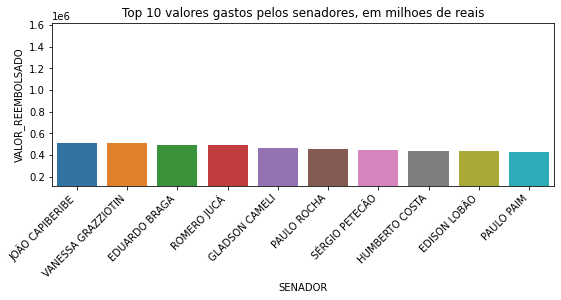

In [134]:
plt.figure(figsize=(9, 3))
chart = sns.barplot(data = top10_2017_gasto, x=top10_2017_gasto.index, y="VALOR_REEMBOLSADO")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylim(top10_2017_gasto.min()[0]-10000, top10_2017_gasto.max()[0]+10000)
plt.title("Top 10 valores gastos pelos senadores, em milhoes de reais")

Text(0.5, 1.0, 'Top 10 valores gastos pelos senadores, em milhoes de reais')

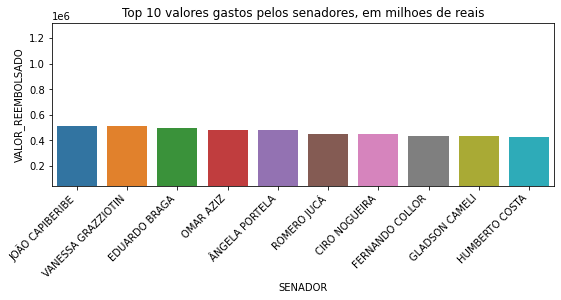

In [135]:
plt.figure(figsize=(9, 3))
chart = sns.barplot(data = top10_2018_gasto, x=top10_2018_gasto.index, y="VALOR_REEMBOLSADO")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylim(top10_2018_gasto.min()[0]-10000, top10_2018_gasto.max()[0]+10000)
plt.title("Top 10 valores gastos pelos senadores, em milhoes de reais")

Text(0.5, 1.0, 'Top 10 valores gastos pelos senadores, em milhoes de reais')

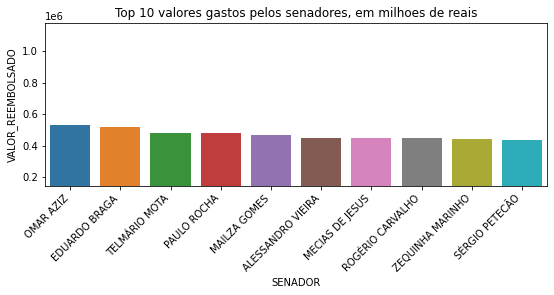

In [137]:
plt.figure(figsize=(9, 3))
chart = sns.barplot(data = top10_2019_gasto, x=top10_2019_gasto.index, y="VALOR_REEMBOLSADO")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylim(top10_2019_gasto.min()[0]-10000, top10_2019_gasto.max()[0]+10000)
plt.title("Top 10 valores gastos pelos senadores, em milhoes de reais")

Text(0.5, 1.0, 'Top 10 valores gastos pelos senadores, em milhoes de reais')

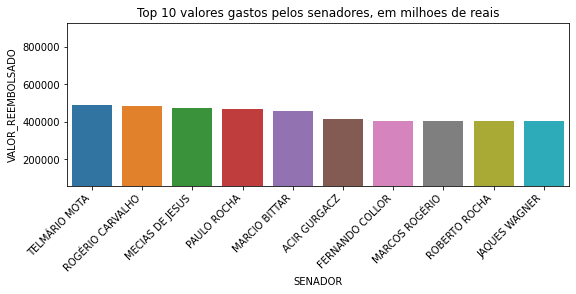

In [136]:
plt.figure(figsize=(9, 3))
chart = sns.barplot(data = top10_2020_gasto, x=top10_2020_gasto.index, y="VALOR_REEMBOLSADO")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylim(top10_2020_gasto.min()[0]-10000, top10_2020_gasto.max()[0]+10000)
plt.title("Top 10 valores gastos pelos senadores, em milhoes de reais")

Text(0.5, 1.0, 'Top 10 valores gastos pelos senadores, em milhoes de reais')

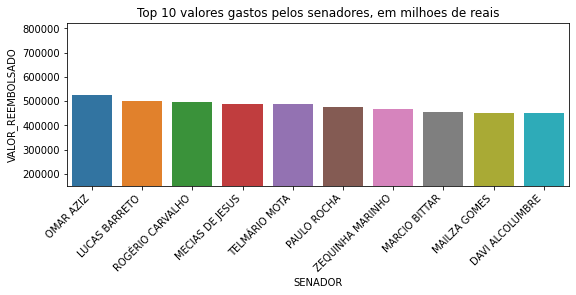

In [138]:
plt.figure(figsize=(9, 3))
chart = sns.barplot(data = top10_2021_gasto, x=top10_2021_gasto.index, y="VALOR_REEMBOLSADO")
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.ylim(top10_2021_gasto.min()[0]-10000, top10_2021_gasto.max()[0]+10000)
plt.title("Top 10 valores gastos pelos senadores, em milhoes de reais")

## Qual a empresa teve mais contratos com os senadores?

In [208]:
empresas_mais_notas = df[["CNPJ_CPF"]].value_counts()
empresas_mais_notas[:10]

CNPJ_CPF          
16.978.175/0001-08    7661
33.937.681/0001-78    2858
02.558.157/0001-62    2302
07.575.651/0001-59    2213
26.480.780/0001-08    1342
00.031.708/0001-00    1183
33.469.172/0022-92    1146
02.575.829/0001-48    1021
00.821.459/0001-56     862
09.296.295/0001-60     800
dtype: int64

Podemos observar que algumas empresas respondem por um considerado numero de notas emitidas

In [195]:
df[["TIPO_DESPESA","CNPJ_CPF","FORNECEDOR"]][df["CNPJ_CPF"] == "16.978.175/0001-08"].value_counts()

TIPO_DESPESA                                                                                                                                                                                     CNPJ_CPF            FORNECEDOR                       
Passagens aéreas, aquáticas e terrestres nacionais                                                                                                                                               16.978.175/0001-08  ADRIA VIAGENS E TURISMO LTDA         1921
                                                                                                                                                                                                                     Adria Viagens e Turismo Ltda.         797
                                                                                                                                                                                                                     Adria Viagens e Turismo Ltda  

In [202]:
# 1 lugar
df[["TIPO_DESPESA","CNPJ_CPF","FORNECEDOR"]][df["CNPJ_CPF"] == "16.978.175/0001-08"].value_counts()

TIPO_DESPESA                                                                                                                                                                                     CNPJ_CPF            FORNECEDOR                       
Passagens aéreas, aquáticas e terrestres nacionais                                                                                                                                               16.978.175/0001-08  ADRIA VIAGENS E TURISMO LTDA         1921
                                                                                                                                                                                                                     Adria Viagens e Turismo Ltda.         797
                                                                                                                                                                                                                     Adria Viagens e Turismo Ltda  

In [203]:
# 2 lugar
df[["TIPO_DESPESA","CNPJ_CPF","FORNECEDOR"]][df["CNPJ_CPF"] == "33.937.681/0001-78"].value_counts()

TIPO_DESPESA                                        CNPJ_CPF            FORNECEDOR               
Passagens aéreas, aquáticas e terrestres nacionais  33.937.681/0001-78  LATAM                        2839
                                                                        LATAM AIRLINES GROUP S.A.      17
                                                                        LATAM Airlines Group S.A.       2
dtype: int64

In [197]:
# 3º lugar
df[["TIPO_DESPESA","CNPJ_CPF","FORNECEDOR"]][df["CNPJ_CPF"] == "02.558.157/0001-62"].value_counts()

TIPO_DESPESA                                                                              CNPJ_CPF            FORNECEDOR                    
Aluguel de imóveis para escritório político, compreendendo despesas concernentes a eles.  02.558.157/0001-62  VIVO                              491
                                                                                                              Telefônica Brasil S/A             227
                                                                                                              Telefonica Brasil S/A             190
                                                                                                              TELEFONICA BRASIL S.A             159
                                                                                                              VIVO - TELEFONICA BRASIL S.A.     116
                                                                                                              Telefônic

As duas emrpesas com maior volume de notas constituem, em sua grande maioria, notas de passagens aereas.
E a terceira maior está relacionada ao aluguel de imoveis e suas despesas, mais especificamente telefonia

## Vamos ver quais empresas receberam a maior quantia total no período

In [278]:
empresas_maiores_valores = df[["CNPJ_CPF","VALOR_REEMBOLSADO"]].groupby("CNPJ_CPF").sum().sort_values(by="VALOR_REEMBOLSADO", ascending=False)

In [209]:
total = 0
for empresa in empresas_maiores_valores.index[:10]:
  if empresa in empresas_mais_notas.index[:10]:
    valor = empresas_maiores_valores.loc[empresa][0]
    valor = "$ {:,.2f}".format(valor)
    print(f"A empresa de cnpj {empresa} recebeu um total de R{valor}")
    total+=1
print(f"\no total de empresas no top 10 notas que aparecem no top 10 gastos foi de {total}")

A empresa de cnpj 16.978.175/0001-08 recebeu um total de R$ 8,572,286.36
A empresa de cnpj 33.937.681/0001-78 recebeu um total de R$ 3,685,797.41
A empresa de cnpj 07.575.651/0001-59 recebeu um total de R$ 2,927,094.98
A empresa de cnpj 26.480.780/0001-08 recebeu um total de R$ 1,730,988.72
A empresa de cnpj 02.558.157/0001-62 recebeu um total de R$ 1,123,525.58

o total de empresas no top 10 notas que aparecem no top 10 gastos foi de 5


In [200]:
empresas_maiores_valores["VALOR_REEMBOLSADO"]

CNPJ_CPF
16.978.175/0001-08    8572286.36
33.937.681/0001-78    3685797.41
07.575.651/0001-59    2927094.98
26.480.780/0001-08    1730988.72
02.558.157/0001-62    1123525.58
                         ...    
28.133.619/0001-93          4.99
10.169.247/0001-90          2.85
09.313.969/0001-97          2.30
04.979.782/0001-03          0.04
01.029.371/0001-69          0.03
Name: VALOR_REEMBOLSADO, Length: 10561, dtype: float64

In [281]:
empresa_cnpj = {}

for i in empresas_maiores_valores[:10].index:
  empresa_cnpj[i] = df[df["CNPJ_CPF"] == i]["FORNECEDOR"].iloc[0]

In [ ]:
cnpj_nome = pd.DataFrame({"CNPJ_CPF":empresa_cnpj.keys(),"NOME":empresa_cnpj.values()}, index = range(len(empresa_cnpj)))
empresas_maiores_valores = pd.merge(empresas_maiores_valores[:10], cnpj_nome,  left_on="CNPJ_CPF", right_on="CNPJ_CPF")

In [283]:
empresas_maiores_valores

,CNPJ_CPF,VALOR_REEMBOLSADO,NOME
0,16.978.175/0001-08,8572286.36,ADRIA VIAGENS E TURISMO
1,33.937.681/0001-78,3685797.41,LATAM
2,07.575.651/0001-59,2927094.98,VIAÇÃO GOL
3,26.480.780/0001-08,1730988.72,LM EMPRESA DE TURISMO LTDA
4,02.558.157/0001-62,1123525.58,Telefonica Brasil S/A
5,22.793.293/0001-44,1010200.00,Jefferson L R Coronel - Me
6,31.837.019/0001-10,950000.00,BORA AGENCIADE PUBLICIDADE E PROPAGANDA EIRELI
7,02.354.051/0001-47,913505.69,SUPERPHOTO COMUNICAÇÃO LIMITADA
8,37.195.146/0001-40,861200.00,Home Mix Produção e Assessoria em Radiodifusão...
9,33.055.400/0001-53,855000.00,L COELHO SERRA


Text(0.5, 1.0, 'Top 10 CNPJs que mais receberam valores no acumulado entre 2017 e 04/2022')

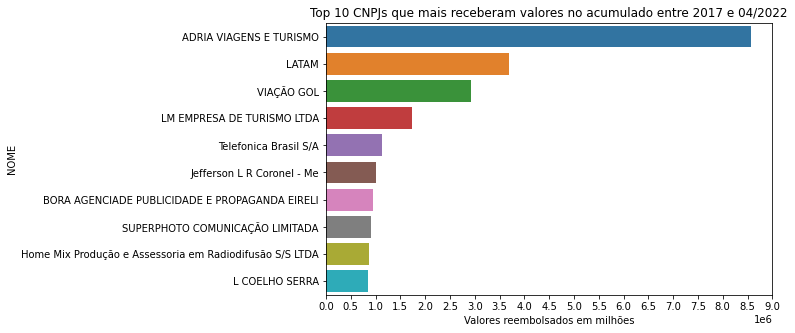

In [284]:
plt.figure(figsize=(8,5))
sns.despine(left=True, bottom=True)
g= sns.barplot(data = empresas_maiores_valores,x = "VALOR_REEMBOLSADO", y  = "NOME", orient="h")

g.set_xticks(np.arange(0,9500000,500000))
plt.xlabel("Valores reembolsados em milhões")
g.set_title("Top 10 CNPJs que mais receberam valores no acumulado entre 2017 e 04/2022")

1. De longe a empresa que mais recebeu valores dos senadores foi a empresa ADRIA VIAGENS E TURISMO LTDA, que também foi a mesma que teve o maior volume de notas.
2. Em segundo lugar temos a LATAM, também segunda colocada em volume de notas
3. Em terceiro lugar temos a GOL